In [1]:
# Import library
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os, glob
import math

In [2]:
# Search directory hierarchy

def search(dirname):
    
    filename = os.listdir(dirname)
    
    for file in filename:
        
        fullname = os.path.join(dirname, file)
        print(fullname)

In [3]:
search('/home/dohwaseo/aiffel/rock_scissor_paper')

/home/dohwaseo/aiffel/rock_scissor_paper/scissor
/home/dohwaseo/aiffel/rock_scissor_paper/paper
/home/dohwaseo/aiffel/rock_scissor_paper/.ipynb_checkpoints
/home/dohwaseo/aiffel/rock_scissor_paper/rock


In [4]:
# Data Preprocessing

def image_dir_path(path: str):
    
    image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/{}".format(path)
    return image_path
    

def image_len(path):
    
    image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/{}".format(path)
    images = glob.glob(image_path + "/*.jpg")
    return len(images)

In [5]:
print("paper의 개수는:", image_len("paper"))
print("rock의 개수는:", image_len("rock"))
print("scissor의 개수는:", image_len("scissor"))

paper의 개수는: 1631
rock의 개수는: 1630
scissor의 개수는: 1635


##### 충분한 수의 데이터를 보유하는 듯 하다!

In [7]:
# 224 x 224 -> 64 x 64 resizing 

def resize_images(img_path):
    
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    target_size=(64,64)
    
    for img in images:
        
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print("Resize completed")

In [8]:
resize_images(image_dir_path("paper"))
resize_images(image_dir_path("rock"))
resize_images(image_dir_path("scissor"))

1631  images to be resized.
Resize completed
1630  images to be resized.
Resize completed
1635  images to be resized.
Resize completed


In [9]:
# Load Train data
train_data_sum = image_len("paper")+image_len("rock")+image_len("scissor")

def load_data(img_path, number_of_data):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, train_data_sum)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4896 입니다.
x_train shape: (4896, 64, 64, 3)
y_train shape: (4896,)


In [10]:
# set validation data

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                   test_size = 0.4,
                                                    random_state = 1)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
                                               test_size = 0.5,
                                               random_state = 2)

x_train = x_train.astype('float32')/255.0   # 입력은 0~1 사이의 값으로 정규화
y_train = to_categorical(y_train)
x_val = x_val.astype('float32')/255.0 
y_val = to_categorical(y_val)
x_test = x_test.astype('float32')/255.0
y_test = to_categorical(y_test)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(2937, 64, 64, 3) (2937, 3) (979, 64, 64, 3) (979, 3) (980, 64, 64, 3) (980, 3)


label:  [1. 0. 0.]
(979, 64, 64, 3) (979, 3) (2937, 64, 64, 3) (2937, 3)


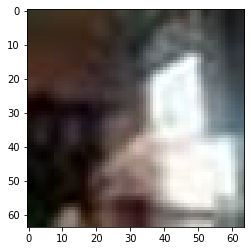

In [11]:
# Display image

plt.imshow(x_train[0])
print('label: ', y_train[0])
print(x_val.shape, y_val.shape, x_train.shape, y_train.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

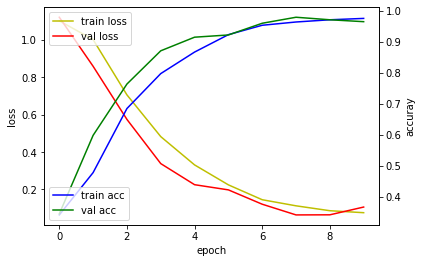

In [12]:
# Model build

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


hist = model.fit(x_train, y_train,
                 epochs=10,
                 validation_data = (x_val, y_val))

# display training process 
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
#model evaluate

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

31/31 - 0s - loss: 0.1073 - accuracy: 0.9633
test_loss: 0.10725396871566772 
test_accuracy: 0.9632652997970581
